<a href="https://colab.research.google.com/github/yohan2001colombo/pyTorch/blob/main/pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

In [3]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.2.0.38

List

In [4]:
my_list = [1,2,3,4,5,57,8]
my_list_2d = [[1,2,3],[4,5,6]]
print(my_list)
print(my_list_2d)

[1, 2, 3, 4, 5, 57, 8]
[[1, 2, 3], [4, 5, 6]]


Array

In [5]:
array = np.random.rand(3,2)
print(array)

[[0.85151398 0.76446176]
 [0.31278457 0.42832882]
 [0.04053927 0.3910008 ]]


Tensor

In [6]:
tensors = torch.rand(3,2)
print(tensors)

tensor([[0.4240, 0.3543],
        [0.5679, 0.8880],
        [0.8579, 0.0740]])


In [7]:
torch.tensor(array)

tensor([[0.8515, 0.7645],
        [0.3128, 0.4283],
        [0.0405, 0.3910]], dtype=torch.float64)

Tensor Operations-Reshape and Slice

In [11]:
my_torch = torch.arange(10)
print(my_torch)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [12]:
# Reshape and View
my_torch2 = my_torch.reshape(2,5)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [13]:
my_torch3 = my_torch2.reshape(5,2)
print(my_torch3)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


In [15]:
my_torch3[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

Tensor Math Operation

In [16]:
torch4 = torch.tensor([1,3,4,5])
torch5 = torch.tensor([4,4,4,4])


Addition

In [17]:
torch4+torch5

tensor([5, 7, 8, 9])

In [21]:
torch4.add(torch5)
torch5.sub(torch4)
torch4.mul(torch5)
torch4**torch5

tensor([  1,  81, 256, 625])

In [22]:
# Reassignment
torch4.add_(torch5)
# new tensor coming as torch4

tensor([5, 7, 8, 9])

**Basic Neural Network**

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [26]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [27]:
# Pick a manual seed for randomization
torch.manual_seed(42)
# Create an instance of model
model = Model()

Class example

In [32]:
class results():
  def __init__(self,marks,grade):
    super().__init__()
    self.marks = marks
    self.grade = grade

  def sport(self):
    return self.marks+10

  def attendence(self):
    return self.marks-10

In [33]:
res = results(56,"A")
res.sport()
res.sport()

66

Load data and Train Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Iris.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/iris",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-35-da7abe5d6ba3>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [37]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
df.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [42]:
#
df['variety'] = [0 if s=="Iris-setosa" else 1 if s=="Iris-versicolor" else 2 for s in df['Species']]

In [43]:
df.variety.value_counts()

,count
variety,
0,50
1,50
2,50


In [ ]:
# Train Test Split! set x, y

In [47]:
x = df.drop(['Id','Species','variety'],axis=1)
y = df.variety

In [48]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
x = x.values
y = y.values

In [50]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
# convert x features to tensor float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:
# set the criterian of model to measure the error
criterian = nn.CrossEntropyLoss()
# choose Optimizer (Adam Optimizer)
# lr = learning rate (if error doesn't go down after a bunch of iterations (epoc)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [56]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [61]:
y_pred = model.forward(X_train) # get predicted results
  # measure the losses/error
losses = criterian(y_pred,y_train)

In [63]:
losses.detach().numpy() # we can add looses to

array(1.0846847, dtype=float32)

In [64]:
# Train our model
# Epochs (one run through all the training data in our network)
epochs = 100
loss = []
for i in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train) # get predicted results
  # measure the losses/error
  losses = criterian(y_pred,y_train)
  # keep track of our losses
  loss.append(losses.detach().numpy())

  # print every 10 epoch
  if i%10 ==0:
    print(f'Epoch:{i} and loss:{losses}')

  # Do some back propagration: take the error rate of forward propagration and feed it back through the network to fine the weights

  optimizer.zero_grad()
  losses.backward()
  optimizer.step()

Epoch:0 and loss:1.0846847295761108
Epoch:10 and loss:0.9183797240257263
Epoch:20 and loss:0.7622429728507996
Epoch:30 and loss:0.6273833513259888
Epoch:40 and loss:0.4667472541332245
Epoch:50 and loss:0.28770601749420166
Epoch:60 and loss:0.16738919913768768
Epoch:70 and loss:0.10598888993263245
Epoch:80 and loss:0.0802135244011879
Epoch:90 and loss:0.06947019696235657


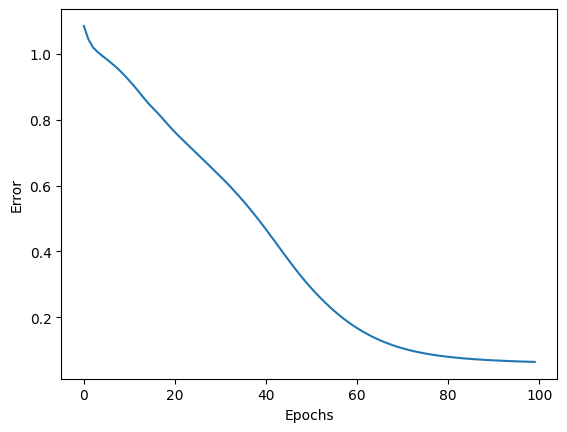

In [66]:
import matplotlib.pyplot as plt

plt.plot(range(epochs),loss)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [69]:
# Evaluate the model

with torch.no_grad():# Turn off the back propagation
  y_eval = model.forward(X_test)
  test_loss = criterian(y_eval,y_test) # find the loss or error

In [70]:
test_loss

tensor(0.0634)

In [79]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    probability = torch.softmax(y_val,dim=0)

    if probability.argmax().item() == y_test[i]:
      correct+=1
    print(f'{y_val} \t {probability.argmax().item()} \t {y_test[i]}')

tensor([-1.4120,  6.3132,  2.6088]) 	 1 	 1
tensor([ 8.4023,  2.4573, -7.5391]) 	 0 	 0
tensor([-12.1991,   1.1829,  13.7443]) 	 2 	 2
tensor([-1.6752,  5.9271,  2.8622]) 	 1 	 1
tensor([-1.5887,  6.7559,  2.8371]) 	 1 	 1
tensor([ 7.8451,  2.3289, -7.0010]) 	 0 	 0
tensor([ 1.1273,  6.0707, -0.0493]) 	 1 	 1
tensor([-5.2088,  4.4484,  6.5316]) 	 2 	 2
tensor([-3.2614,  4.9128,  4.4788]) 	 1 	 1
tensor([0.5683, 6.5565, 0.5445]) 	 1 	 1
tensor([-4.3492,  4.7780,  5.6344]) 	 2 	 2
tensor([ 7.3631,  2.0552, -6.5497]) 	 0 	 0
tensor([ 8.1384,  2.3552, -7.2879]) 	 0 	 0
tensor([ 7.4936,  2.1057, -6.6740]) 	 0 	 0
tensor([ 7.8643,  2.2491, -7.0269]) 	 0 	 0
tensor([-1.3322,  6.5325,  2.5448]) 	 1 	 1
tensor([-8.2712,  2.4244,  9.6406]) 	 2 	 2
tensor([0.3374, 6.4826, 0.7657]) 	 1 	 1
tensor([-1.5909,  5.7677,  2.7565]) 	 1 	 1
tensor([-8.1891,  2.2739,  9.5411]) 	 2 	 2
tensor([ 7.2431,  2.0816, -6.4291]) 	 0 	 0
tensor([-3.9169,  4.6616,  5.1603]) 	 2 	 2
tensor([ 7.3462,  2.2806, -6.5133])

In [78]:
correct

30

In [75]:
y_val.softmax().item()

TypeError: softmax() received an invalid combination of arguments - got (), but expected one of:
 * (int dim, torch.dtype dtype = None)
 * (name dim, *, torch.dtype dtype = None)
